## Машинное обучение, ФКН ВШЭ

## Практическое задание 4

### Общая информация
Дата выдачи: 12 октября 2018

Мягкий дедлайн: 7:59MSK 20 октября 2018 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 21 октября 2018.

In [23]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [24]:
X, y = make_classification(n_samples=100000, n_features=20,
                                    n_informative=10, n_redundant=10,
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [25]:
X

array([[ 2.22166986,  3.21795907, -3.97289121, ..., -0.12357228,
        -1.58455719, -1.600087  ],
       [ 0.50671308,  1.98220073, -4.35309852, ..., -1.59429073,
        -1.72248345,  0.68654232],
       [-4.94528808, -2.63392471,  3.3177046 , ...,  3.13582774,
        -1.89502143,  1.1364294 ],
       ...,
       [-1.47817197,  2.97155728, -1.30834958, ...,  2.70857871,
        -1.62886227, -0.53625907],
       [ 2.47816223, -0.86831125, -4.14713297, ..., -1.3233798 ,
         1.05470785, -0.58261328],
       [ 4.88750763,  0.76437977, -8.47970348, ..., -3.32272294,
         0.84233776, -2.6627686 ]])

In [26]:
y

array([1, 0, 1, ..., 0, 1, 1])

__Задание 1.__ Обучение и применение метода опорных векторов.

__(2 балла)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [27]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [28]:
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

In [29]:
y_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)

print("ROC-AUC: %.3f" % roc_auc_score(y_test, y_pred))
print("PR-AUC: %.3f" % average_precision_score(y_test, y_pred))

ROC-AUC: 0.849
PR-AUC: 0.795


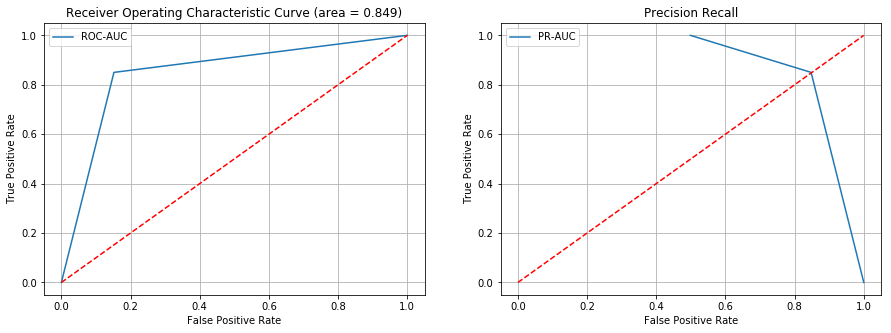

In [30]:
fig, (pl1, pl2) = plt.subplots(1, 2, figsize=(15, 5))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
pl1.plot(fpr, tpr, label='ROC-AUC')
pl1.plot([0, 1], [0, 1], 'r--')
pl1.set_title(u"Receiver Operating Characteristic Curve (area = %0.3f)" % roc_auc)
pl1.set_xlabel(u"False Positive Rate")
pl1.set_ylabel(u"True Positive Rate")
pl1.grid()
pl1.legend()

fpr, tpr, thresholds = precision_recall_curve(y_test, y_pred)
pl2.plot(fpr, tpr, label='PR-AUC')
pl2.plot([0, 1], [0, 1], 'r--')
pl2.set_title(u"Precision Recall")
pl2.set_xlabel(u"False Positive Rate")
pl2.set_ylabel(u"True Positive Rate")
pl2.grid()
pl2.legend()

fig.show()

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

In [31]:
import pylab as pl

In [32]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

In [33]:
model = svm.SVC(kernel='linear') 
model.fit(X_train, y_train)
model.score(X_train, y_train)
y_pred = model.predict(X_test)

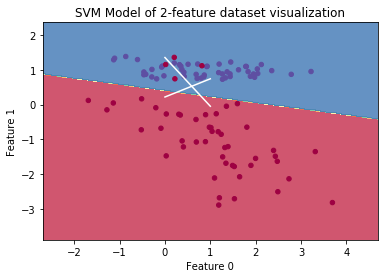

In [34]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

matrix = model.predict(np.c_[xx.ravel(), yy.ravel()])
matrix = matrix.reshape(xx.shape)
out = pl.contourf(xx, yy, matrix, cmap=plt.cm.Spectral, alpha=0.8)

pl.scatter( X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=20)
pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xlabel('Feature 0')
pl.ylabel('Feature 1')

pl.plot(model.support_vectors_[0],'w')
pl.plot(model.support_vectors_[1],'w')

pl.title('SVM Model of 2-feature dataset visualization')
pl.show()

__Задание 2.__ Калибровка вероятностей.

__(2 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [35]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    arr2 = bin_real_ratios
    plt.plot(bin_middle_points, bin_real_ratios)

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [36]:
X, y = make_classification(n_samples=100000, n_features=20,
                                    n_informative=10, n_redundant=10,
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

from sklearn.linear_model import LogisticRegression

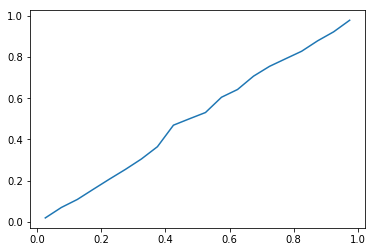

In [56]:
X, y = make_classification(n_samples=100000, n_features=20,
                                    n_informative=10, n_redundant=10,
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict_proba(X_test)[:,1]
plot_calibration_curve(y_test, y_pred)

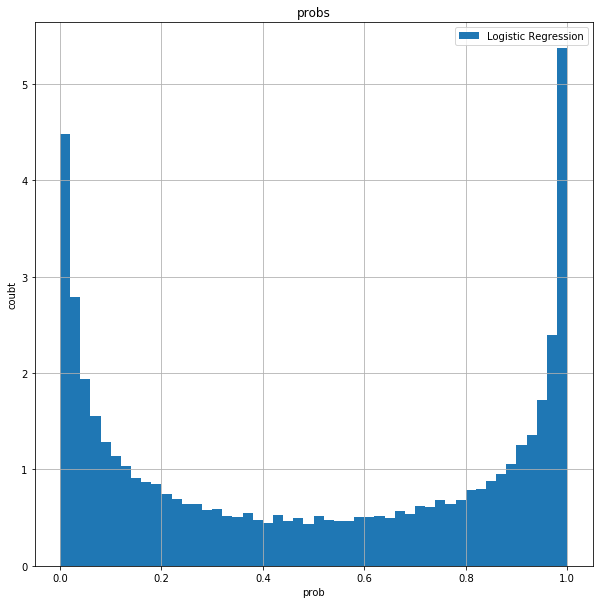

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist(y_pred, normed=True, bins=50, label="Logistic Regression")
ax.set_title(u"probs")
ax.set_xlabel(u"prob")
ax.set_ylabel(u"coubt")
ax.grid()
ax.legend()

fig.show()

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [58]:
from sklearn.calibration import CalibratedClassifierCV

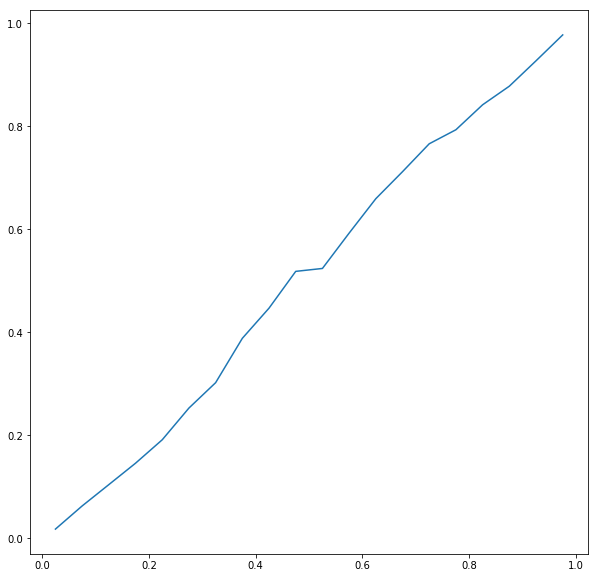

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

cal = CalibratedClassifierCV()
cal.fit(X_train, y_train)
y_pred_cal = cal.predict_proba(X_test)
plot_calibration_curve(y_test, y_pred_cal[:, 1])

Кривая ощутимо улучшилась

## Часть 2. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные с прошлогоднего конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [45]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [46]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

__Задание 0.__ Посчитайте качество (в этом задании будем работать ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]

print('ROC-AUC = {}'.format(roc_auc_score(y_test, y_pred)))

ROC-AUC = 0.62505972260086


__Задание 1.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(1 балл)__

In [49]:
cols = [col for col in X_train.columns if 'cat' in col]

X_train = pd.concat([pd.get_dummies(X_train[col]) for col in cols], axis=1)
X_test = pd.concat([pd.get_dummies(X_test[col]) for col in cols], axis=1)


In [55]:
cur = time.time()
model = LogisticRegression()
model.fit(X_train, y_train)
print(time.time() - cur)
y_pred = model.predict_proba(X_test)[:,1]
print('ROC-AUC = {}'.format(roc_auc_score(y_test, y_pred)))

1.6686348915100098
ROC-AUC = 0.6135867436356491
